In [1]:
# two-truths phenomena
# using Python, GraSPy


import graspy
import matplotlib.pyplot as plt
import numpy as np

from graspy.simulations import sbm
from graspy.embed import AdjacencySpectralEmbed, LaplacianSpectralEmbed
from graspy.plot import heatmap, pairplot
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from pyclust.brute_cluster_pyclust import brute_cluster

%matplotlib inline

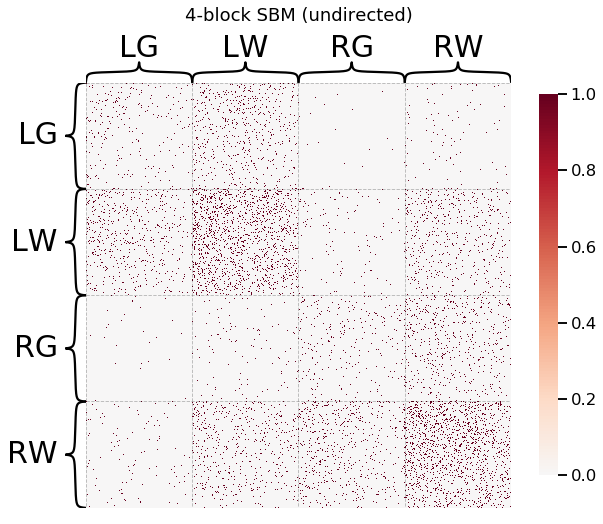

In [2]:
# SBM simulation
# use the p in fig.3 in "On a two-truths phenomenon in spectral graph clustering"
np.random.seed(8989)
n_verts = 200
labels_sbm = n_verts * ["LG"] + n_verts * ["LW"] + n_verts * ["RG"] + n_verts * ["RW"]
P = np.array([[0.020, 0.044, 0.002, 0.009],
              [0.044, 0.115, 0.010, 0.042],
              [0.002, 0.010, 0.020, 0.045],
              [0.009, 0.042, 0.045, 0.117]])
undirected_sbm = sbm(4 * [n_verts], P)
#visualize the sbm graph
heatmap(undirected_sbm, title='4-block SBM (undirected)', inner_hier_labels=labels_sbm)

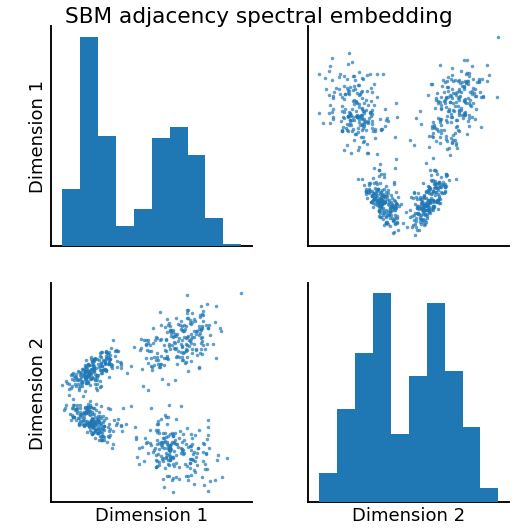

In [3]:
# ASE
ase = AdjacencySpectralEmbed()
ase_Xhat = ase.fit_transform(undirected_sbm)
pairplot(ase_Xhat, title='SBM adjacency spectral embedding', height=4)

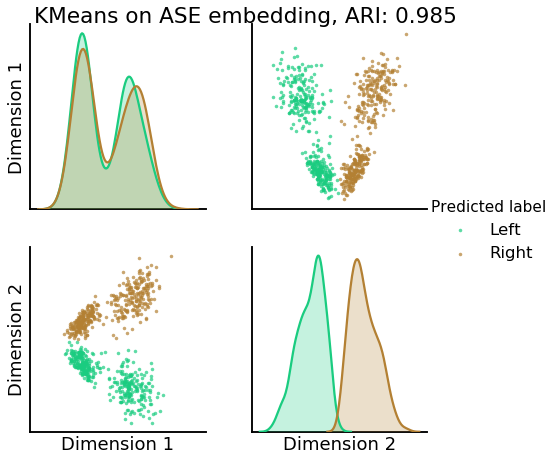

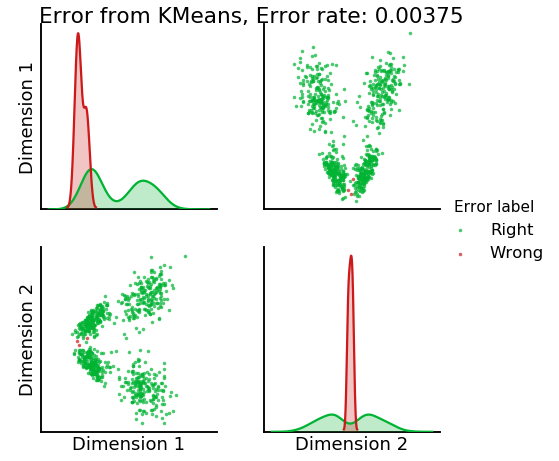

In [4]:
# K-means clustering using ASE
# n_clusters=2
palette_rw = {'Right':(0,0.7,0.2),
           'Wrong':(0.8,0.1,0.1)}
palette_lr = {'Right':(0.7,0.5,0.2),
           'Left':(0.1,0.8,0.5)}
'''
palette_true = {0:(0.7,0.5,0.2),
           1:(0.1,0.8,0.5)}
'''
ase_kmeans = KMeans(n_clusters=2).fit_predict(ase_Xhat)
ase_kmeans_labels = (4 * n_verts) * ['Left']
labels_lr = n_verts * [0] + n_verts * [0] + n_verts * [1] + n_verts * [1] #true label
ase_ari = adjusted_rand_score(labels_lr, ase_kmeans)
ase_error = labels_lr - ase_kmeans
ase_error = ase_error != 0
# sometimes the labels given by kmeans will be the inverse of ours
if np.sum(ase_error) / (4 * n_verts) > 0.5:
    ase_error = ase_error == 0
    for i in range(np.size(ase_kmeans)):
        if not ase_kmeans[i]:
            ase_kmeans_labels[i] = 'Right'
else:
    for i in range(np.size(ase_kmeans)):
        if ase_kmeans[i]:
            ase_kmeans_labels[i] = 'Right'

ase_error_rate = np.sum(ase_error) / (4 * n_verts)
ase_error_label = (4 * n_verts) * ['Right']
ase_error_label = np.array(ase_error_label)
ase_error_label[ase_error] = 'Wrong'

pairplot(ase_Xhat,
         labels=ase_kmeans_labels,
         title='KMeans on ASE embedding, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_lr)
'''
pairplot(ase_Xhat,
         labels=labels_lr,
         title='KMeans on ASE embedding, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_true)
'''
pairplot(ase_Xhat,
         labels=ase_error_label,
         title='Error from KMeans, Error rate: {}'.format(str(ase_error_rate)),
         legend_name='Error label',
         height=3.5,
         palette=palette_rw)

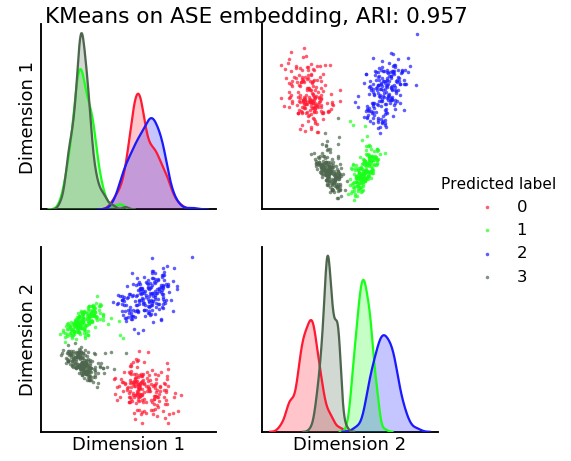

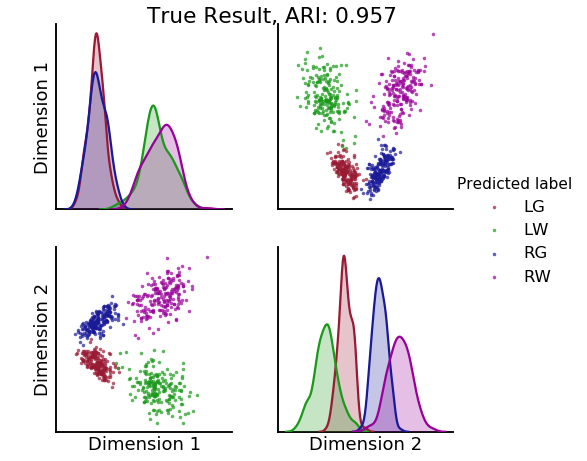

In [5]:
# K-means clustering using ASE
# n_clusters=4

palette_result = {0:(1,0.1,0.2),
                         1:(0.1,1,0.1),
                         2:(0.1,0.1,1),
                         3:(0.3,0.4,0.3)}

palette_true = {'LG':(0.6,0.1,0.2),
                'LW':(0.1,0.6,0.1),
                'RG':(0.1,0.1,0.6),
                'RW':(0.6,0,0.6)}

ase_kmeans = KMeans(n_clusters=4).fit_predict(ase_Xhat)
ase_ari = adjusted_rand_score(labels_sbm, ase_kmeans)


pairplot(ase_Xhat,
         labels=ase_kmeans,
         title='KMeans on ASE embedding, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_result)

pairplot(ase_Xhat,
         labels=labels_sbm,
         title='True Result, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_true)


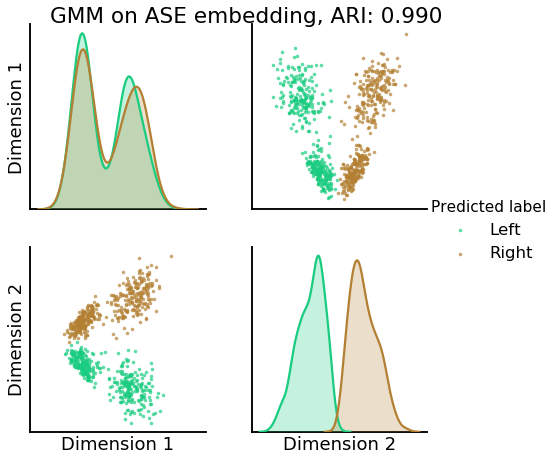

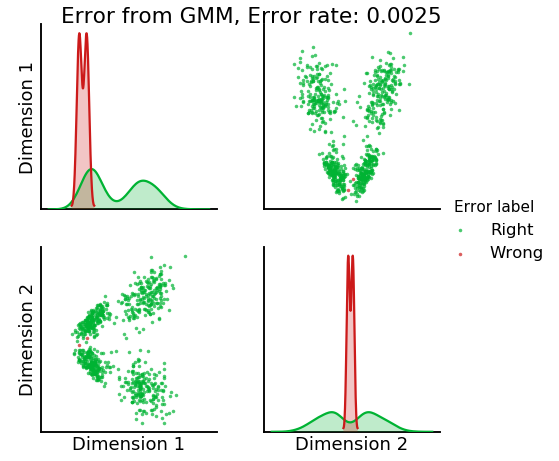

In [6]:
# GMM clustering using ASE
# n_components=2

palette_rw = {'Right':(0,0.7,0.2),
           'Wrong':(0.8,0.1,0.1)}
palette_lr = {'Right':(0.7,0.5,0.2),
           'Left':(0.1,0.8,0.5)}

gmm_ase = GaussianMixture(n_components=2).fit(ase_Xhat)
ase_gmm = gmm_ase.predict(ase_Xhat)
ase_gmm_labels = (4 * n_verts) * ['Left']
labels_lr = n_verts * [0] + n_verts * [0] + n_verts * [1] + n_verts * [1] #true label
ase_ari = adjusted_rand_score(labels_lr, ase_gmm)
ase_error = labels_lr - ase_gmm
ase_error = ase_error != 0
# sometimes the labels given by kmeans will be the inverse of ours
if np.sum(ase_error) / (4 * n_verts) > 0.5:
    ase_error = ase_error == 0
    for i in range(np.size(ase_gmm)):
        if not ase_gmm[i]:
            ase_gmm_labels[i] = 'Right'
else:
    for i in range(np.size(ase_gmm)):
        if ase_gmm[i]:
            ase_gmm_labels[i] = 'Right'

ase_error_rate = np.sum(ase_error) / (4 * n_verts)
ase_error_label = (4 * n_verts) * ['Right']
ase_error_label = np.array(ase_error_label)
ase_error_label[ase_error] = 'Wrong'

pairplot(ase_Xhat,
         labels=ase_gmm_labels,
         title='GMM on ASE embedding, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_lr)
pairplot(ase_Xhat,
         labels=ase_error_label,
         title='Error from GMM, Error rate: {}'.format(str(ase_error_rate)),
         legend_name='Error label',
         height=3.5,
         palette=palette_rw)

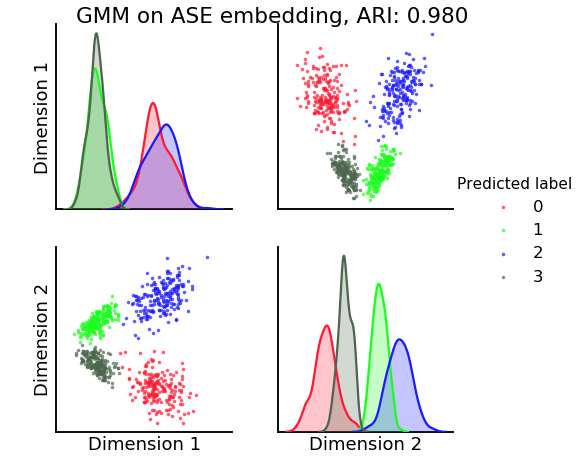

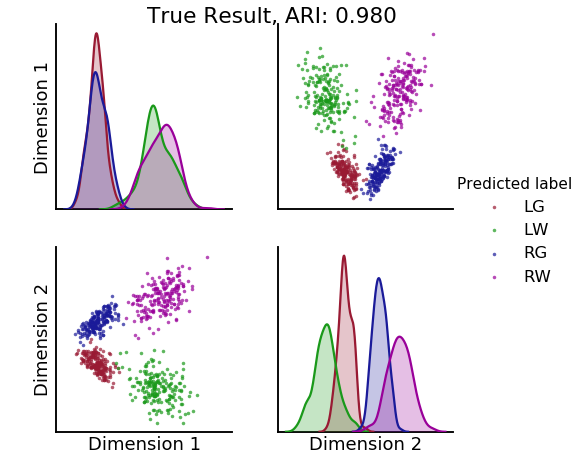

In [7]:
# gmm clustering using ASE
# n_clusters=4

palette_result = {0:(1,0.1,0.2),
                  1:(0.1,1,0.1),
                  2:(0.1,0.1,1),
                  3:(0.3,0.4,0.3)}

palette_true = {'LG':(0.6,0.1,0.2),
                'LW':(0.1,0.6,0.1),
                'RG':(0.1,0.1,0.6),
                'RW':(0.6,0,0.6)}

gmm_ase = GaussianMixture(n_components=4).fit(ase_Xhat)
ase_gmm = gmm_ase.predict(ase_Xhat)
ase_ari = adjusted_rand_score(labels_sbm, ase_gmm)

pairplot(ase_Xhat,
         labels=ase_gmm,
         title='GMM on ASE embedding, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_result)

pairplot(ase_Xhat,
         labels=labels_sbm,
         title='True Result, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_true)

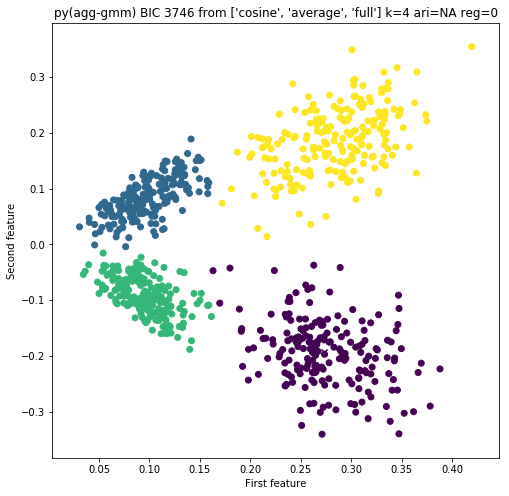

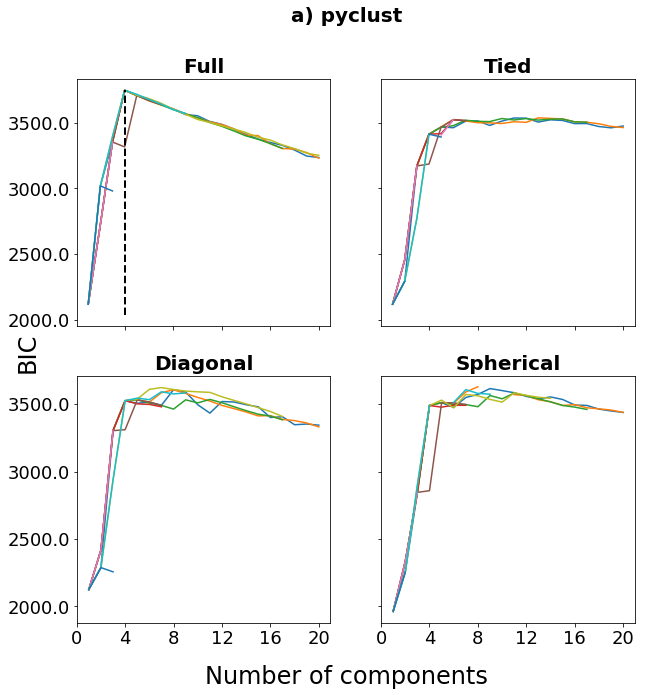

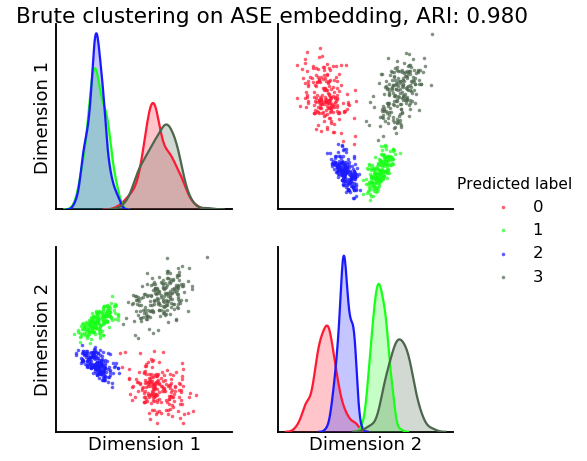

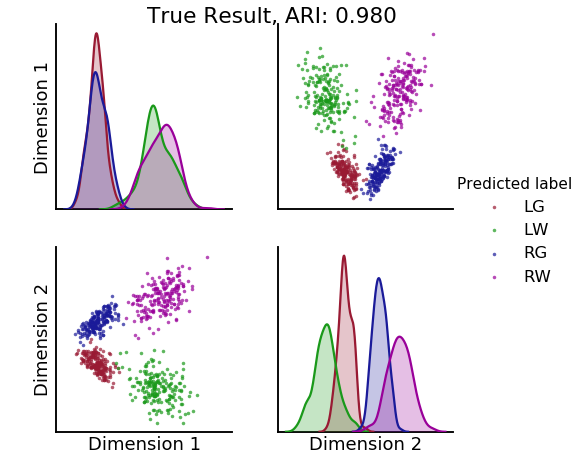

In [8]:
# Brute clustering using ASE
# ks not specified

palette_result = {0:(1,0.1,0.2),
                  1:(0.1,1,0.1),
                  2:(0.1,0.1,1),
                  3:(0.3,0.4,0.3)}

palette_true = {'LG':(0.6,0.1,0.2),
                'LW':(0.1,0.6,0.1),
                'RG':(0.1,0.1,0.6),
                'RW':(0.6,0,0.6)}

ase_bru,_,_,_,_,_ = brute_cluster(ase_Xhat)
ase_ari = adjusted_rand_score(labels_sbm, ase_bru)

pairplot(ase_Xhat,
         labels=ase_bru,
         title='Brute clustering on ASE embedding, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_result)

pairplot(ase_Xhat,
         labels=labels_sbm,
         title='True Result, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_true)

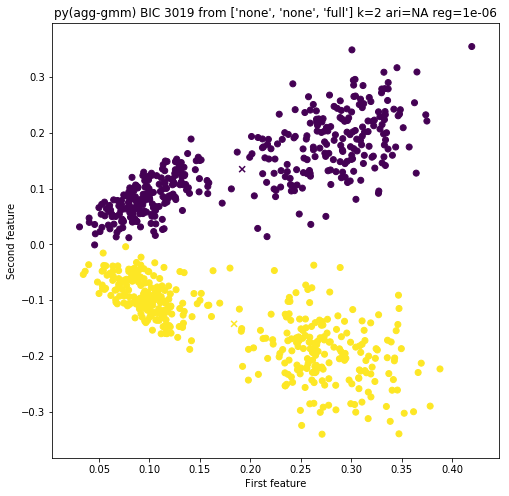

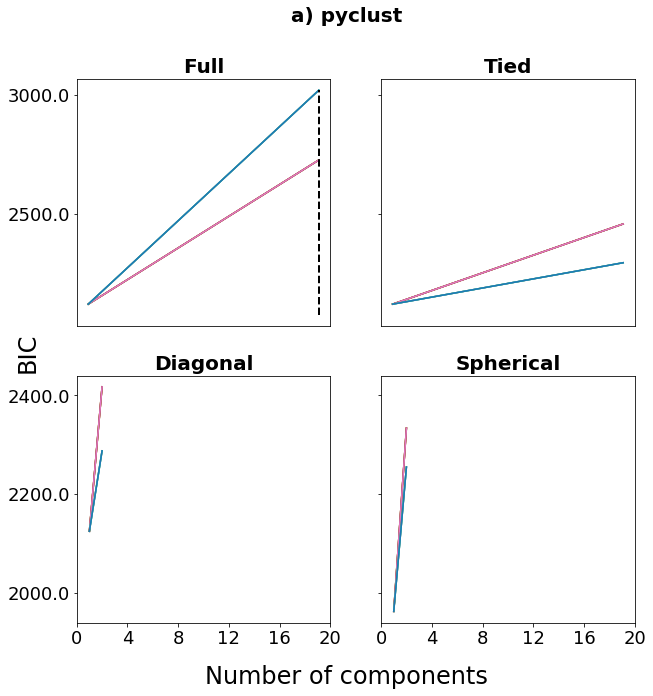

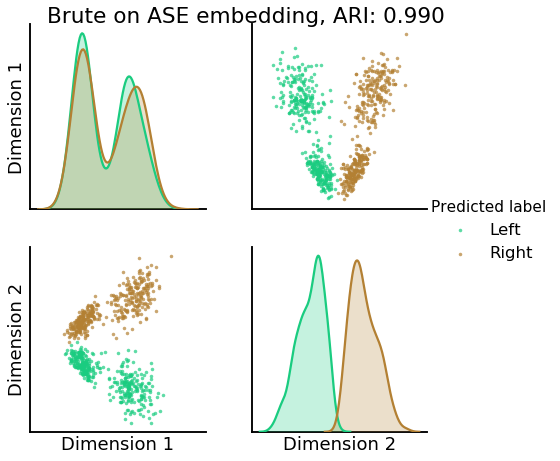

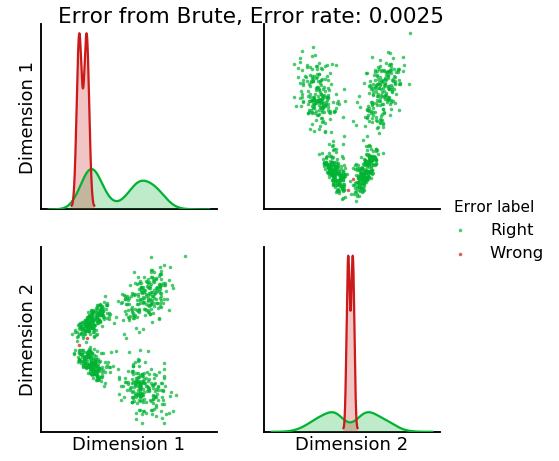

In [17]:
# Brute clustering using ASE
# ks = 2

palette_rw = {'Right':(0,0.7,0.2),
           'Wrong':(0.8,0.1,0.1)}
palette_lr = {'Right':(0.7,0.5,0.2),
           'Left':(0.1,0.8,0.5)}

ase_bru,_,_,_,_,_ = brute_cluster(ase_Xhat,ks = range(1,3))
ase_gmm = ase_bru.copy()
ase_gmm_labels = (4 * n_verts) * ['Left']
labels_lr = n_verts * [0] + n_verts * [0] + n_verts * [1] + n_verts * [1] #true label
ase_ari = adjusted_rand_score(labels_lr, ase_gmm)
ase_error = labels_lr - ase_gmm
ase_error = ase_error != 0
# sometimes the labels given by kmeans will be the inverse of ours
if np.sum(ase_error) / (4 * n_verts) > 0.5:
    ase_error = ase_error == 0
    for i in range(np.size(ase_gmm)):
        if not ase_gmm[i]:
            ase_gmm_labels[i] = 'Right'
else:
    for i in range(np.size(ase_gmm)):
        if ase_gmm[i]:
            ase_gmm_labels[i] = 'Right'

ase_error_rate = np.sum(ase_error) / (4 * n_verts)
ase_error_label = (4 * n_verts) * ['Right']
ase_error_label = np.array(ase_error_label)
ase_error_label[ase_error] = 'Wrong'

pairplot(ase_Xhat,
         labels=ase_gmm_labels,
         title='Brute on ASE embedding, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_lr)
pairplot(ase_Xhat,
         labels=ase_error_label,
         title='Error from Brute, Error rate: {}'.format(str(ase_error_rate)),
         legend_name='Error label',
         height=3.5,
         palette=palette_rw)

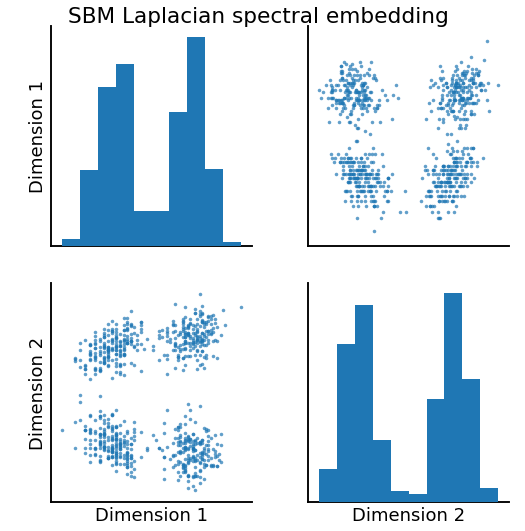

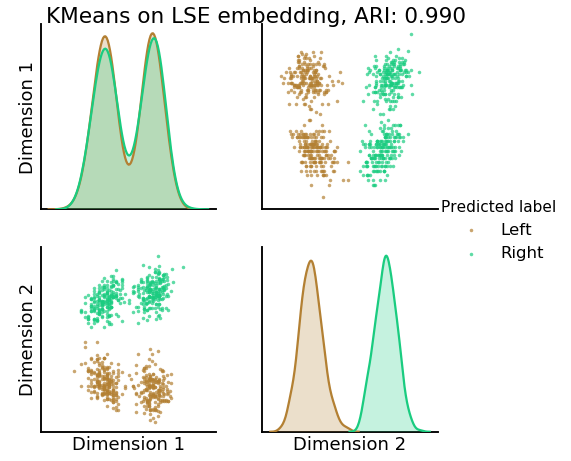

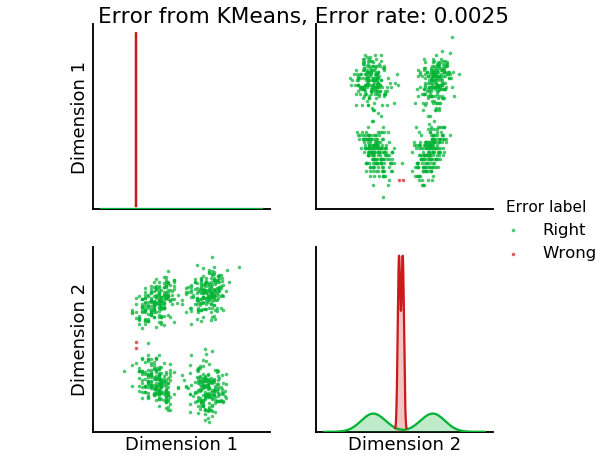

In [10]:
# LSE
lse = LaplacianSpectralEmbed(n_components=None)
lse_Xhat = lse.fit_transform(undirected_sbm)
pairplot(lse_Xhat, title='SBM Laplacian spectral embedding', height=4)
# K-means clustering using LSE
palette_lr = {'Left':(0.7,0.5,0.2),
           'Right':(0.1,0.8,0.5)}
lse_kmeans = KMeans(n_clusters=2).fit_predict(lse_Xhat)
lse_kmeans_labels = (4 * n_verts) * ['Left']
labels_lr = n_verts * [0] + n_verts * [0] + n_verts * [1] + n_verts * [1] #true label
lse_ari = adjusted_rand_score(labels_lr, lse_kmeans)
lse_error = labels_lr - lse_kmeans
lse_error = lse_error != 0
# sometimes the labels given by kmeans will be the inverse of ours
if np.sum(lse_error) / (4 * n_verts) > 0.5:
    lse_error = lse_error == 0
    for i in range(np.size(lse_kmeans)):
        if not lse_kmeans[i]:
            lse_kmeans_labels[i] = 'Right'
else:
    for i in range(np.size(lse_kmeans)):
        if lse_kmeans[i]:
            lse_kmeans_labels[i] = 'Right'

lse_error_rate = np.sum(lse_error) / (4 * n_verts)
lse_error_label = (4 * n_verts) * ['Right']
lse_error_label = np.array(lse_error_label)
lse_error_label[lse_error] = 'Wrong'

pairplot(lse_Xhat,
         labels=lse_kmeans_labels,
         title='KMeans on LSE embedding, ARI: {}'.format(str(lse_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_lr)
pairplot(lse_Xhat,
         labels=lse_error_label,
         title='Error from KMeans, Error rate: {}'.format(str(lse_error_rate)),
         legend_name='Error label',
         height=3.5,
         palette=palette_rw)

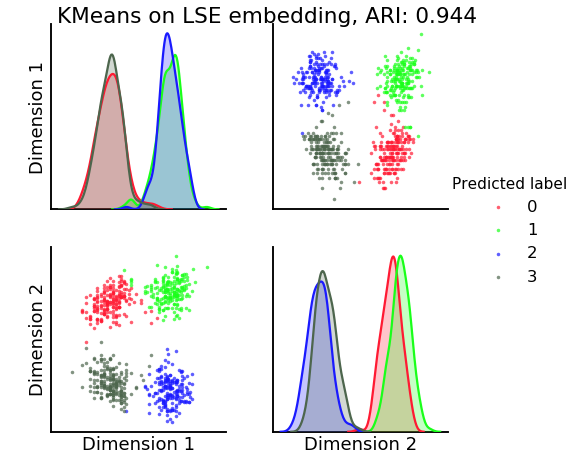

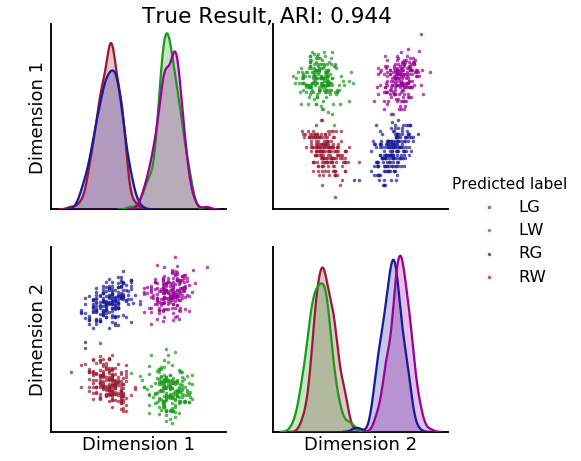

In [11]:
# K-means clustering using LSE
# n_clusters=4

palette_result = {0:(1,0.1,0.2),
                  1:(0.1,1,0.1),
                  2:(0.1,0.1,1),
                  3:(0.3,0.4,0.3)}

palette_true = {'LG':(0.6,0.1,0.2),
                'LW':(0.1,0.6,0.1),
                'RG':(0.1,0.1,0.6),
                'RW':(0.6,0,0.6)}

lse_kmeans = KMeans(n_clusters=4).fit_predict(lse_Xhat)
lse_ari = adjusted_rand_score(labels_sbm, lse_kmeans)


pairplot(lse_Xhat,
         labels=lse_kmeans,
         title='KMeans on LSE embedding, ARI: {}'.format(str(lse_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_result)

pairplot(lse_Xhat,
         labels=labels_sbm,
         title='True Result, ARI: {}'.format(str(lse_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_true)

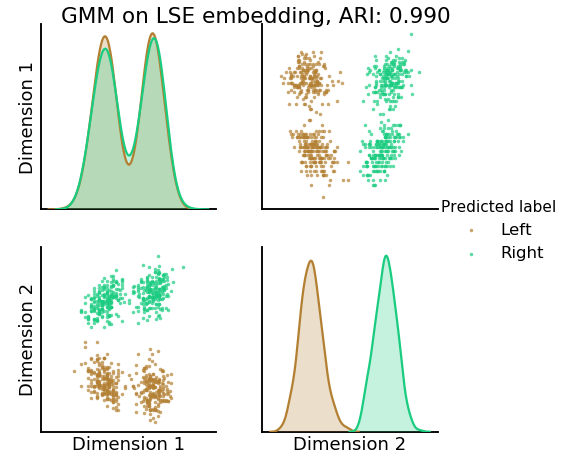

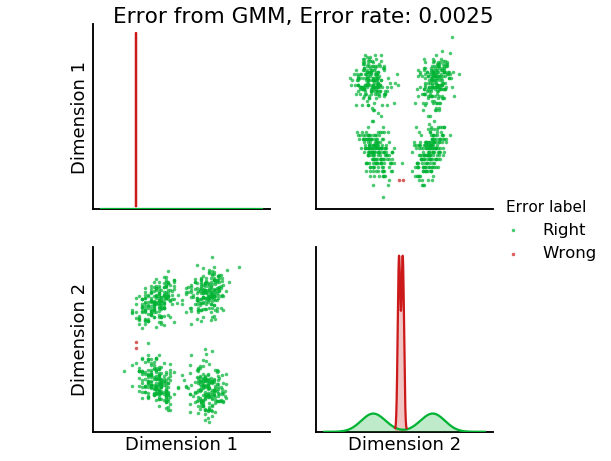

In [12]:
# GMM clustering using LSE
# n_components=2

gmm_lse = GaussianMixture(n_components=2).fit(lse_Xhat)
lse_gmm = gmm_lse.predict(lse_Xhat)
lse_gmm_labels = (4 * n_verts) * ['Left']
labels_lr = n_verts * [0] + n_verts * [0] + n_verts * [1] + n_verts * [1] #true label
lse_ari = adjusted_rand_score(labels_lr, lse_gmm)
lse_error = labels_lr - lse_gmm
lse_error = lse_error != 0
# sometimes the labels given by kmeans will be the inverse of ours
if np.sum(lse_error) / (4 * n_verts) > 0.5:
    lse_error = lse_error == 0
    for i in range(np.size(lse_gmm)):
        if not lse_gmm[i]:
            lse_gmm_labels[i] = 'Right'
else:
    for i in range(np.size(lse_gmm)):
        if lse_gmm[i]:
            lse_gmm_labels[i] = 'Right'

lse_error_rate = np.sum(lse_error) / (4 * n_verts)
lse_error_label = (4 * n_verts) * ['Right']
lse_error_label = np.array(lse_error_label)
lse_error_label[lse_error] = 'Wrong'

pairplot(lse_Xhat,
         labels=lse_gmm_labels,
         title='GMM on LSE embedding, ARI: {}'.format(str(lse_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_lr)
pairplot(lse_Xhat,
         labels=lse_error_label,
         title='Error from GMM, Error rate: {}'.format(str(lse_error_rate)),
         legend_name='Error label',
         height=3.5,
         palette=palette_rw)

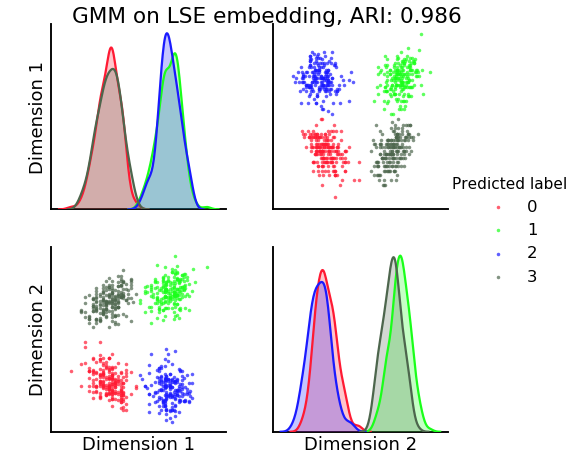

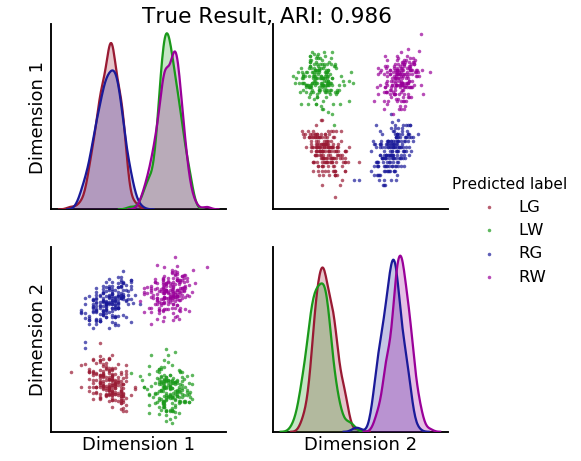

In [13]:
# gmm clustering using LSE
# n_clusters=4

palette_result = {0:(1,0.1,0.2),
                  1:(0.1,1,0.1),
                  2:(0.1,0.1,1),
                  3:(0.3,0.4,0.3)}

palette_true = {'LG':(0.6,0.1,0.2),
                'LW':(0.1,0.6,0.1),
                'RG':(0.1,0.1,0.6),
                'RW':(0.6,0,0.6)}

gmm_lse = GaussianMixture(n_components=4).fit(lse_Xhat)
lse_labels = gmm_lse.predict(lse_Xhat)
lse_ari = adjusted_rand_score(labels_sbm, lse_labels)

pairplot(lse_Xhat,
         labels=lse_labels,
         title='GMM on LSE embedding, ARI: {}'.format(str(lse_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_result)

pairplot(lse_Xhat,
         labels=labels_sbm,
         title='True Result, ARI: {}'.format(str(lse_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_true)

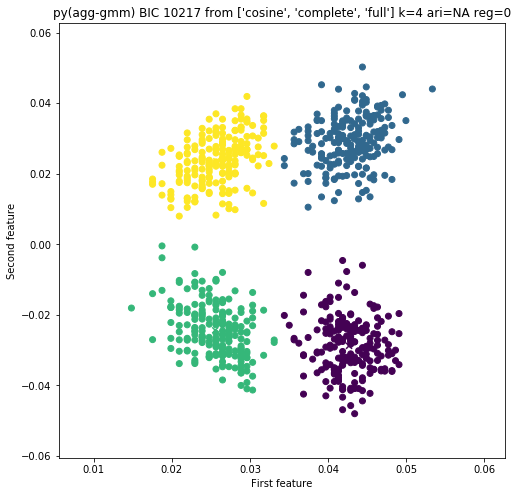

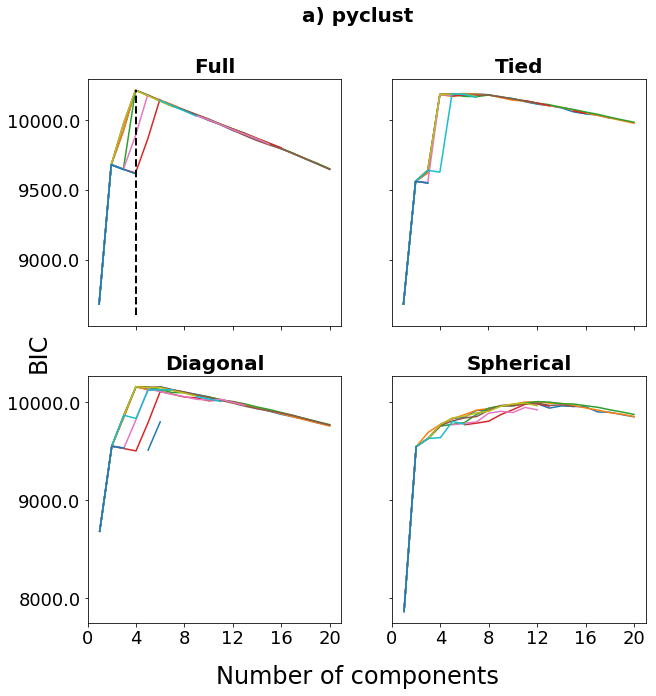

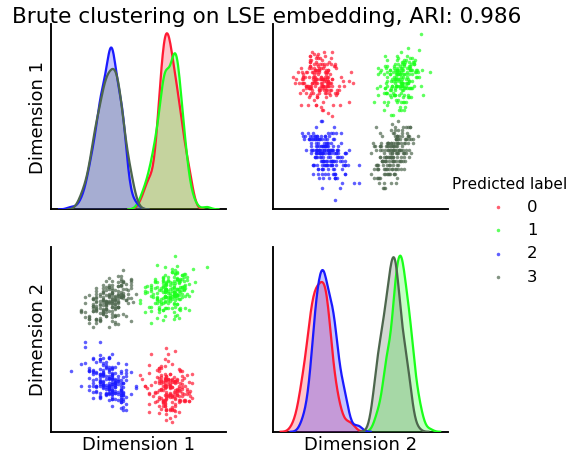

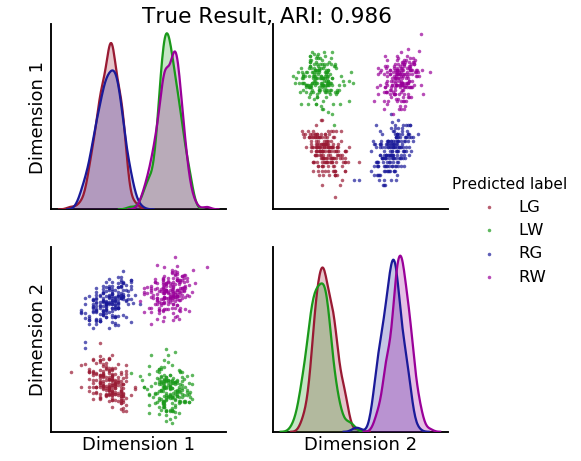

In [14]:
# Brute clustering using LSE
# ks not specified

palette_result = {0:(1,0.1,0.2),
                  1:(0.1,1,0.1),
                  2:(0.1,0.1,1),
                  3:(0.3,0.4,0.3)}

palette_true = {'LG':(0.6,0.1,0.2),
                'LW':(0.1,0.6,0.1),
                'RG':(0.1,0.1,0.6),
                'RW':(0.6,0,0.6)}

lse_bru,_,_,_,_,_ = brute_cluster(lse_Xhat)
lse_ari = adjusted_rand_score(labels_sbm, lse_bru)

pairplot(lse_Xhat,
         labels=lse_bru,
         title='Brute clustering on LSE embedding, ARI: {}'.format(str(lse_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_result)

pairplot(lse_Xhat,
         labels=labels_sbm,
         title='True Result, ARI: {}'.format(str(lse_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_true)

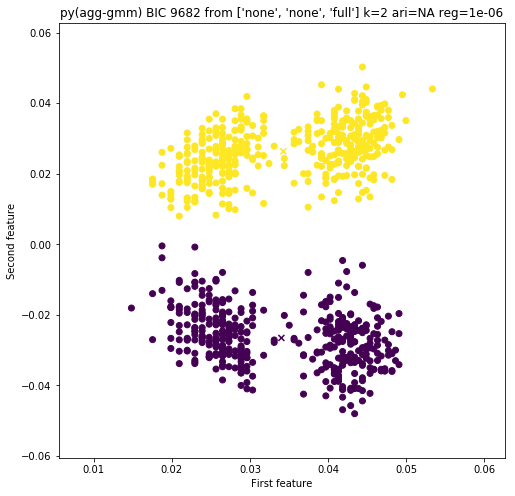

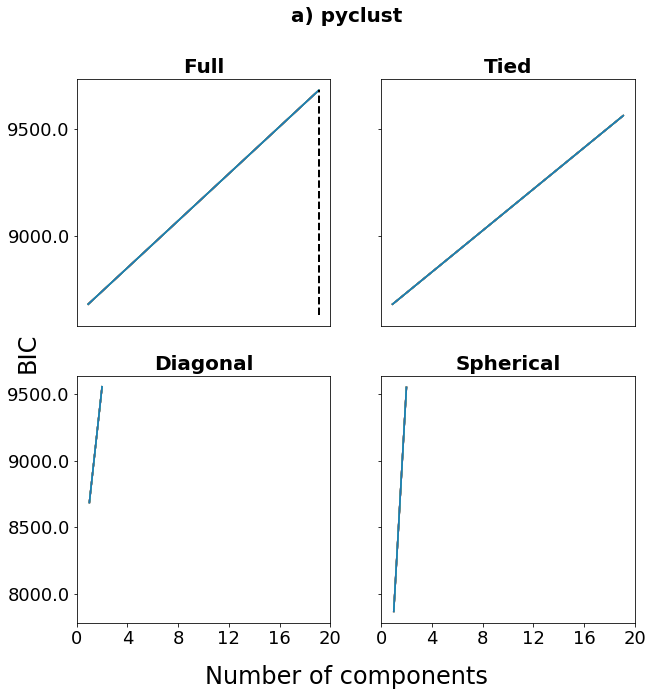

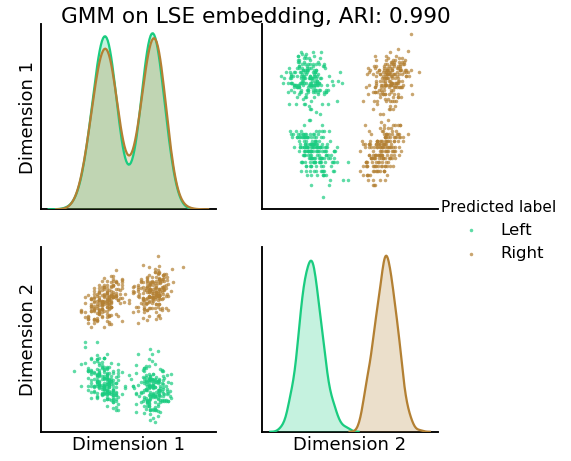

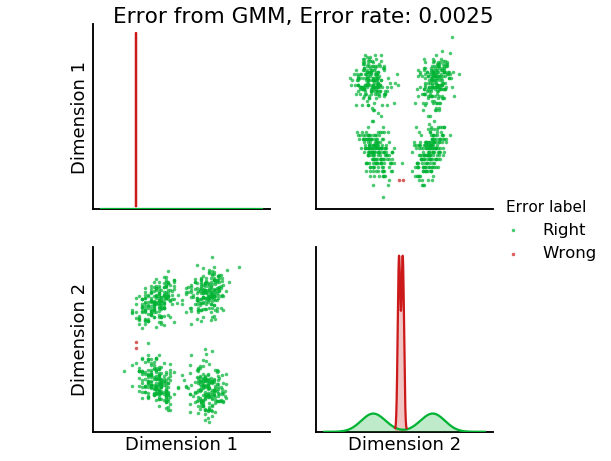

In [16]:
# Brute clustering using ASE
# ks = 2

palette_rw = {'Right':(0,0.7,0.2),
           'Wrong':(0.8,0.1,0.1)}
palette_lr = {'Right':(0.7,0.5,0.2),
           'Left':(0.1,0.8,0.5)}

lse_bru,_,_,_,_,_ = brute_cluster(lse_Xhat,ks = range(1,3))
lse_gmm=lse_bru.copy()
lse_gmm_labels = (4 * n_verts) * ['Left']
labels_lr = n_verts * [0] + n_verts * [0] + n_verts * [1] + n_verts * [1] #true label
lse_ari = adjusted_rand_score(labels_lr, lse_gmm)
lse_error = labels_lr - lse_gmm
lse_error = lse_error != 0
# sometimes the labels given by kmeans will be the inverse of ours
if np.sum(lse_error) / (4 * n_verts) > 0.5:
    lse_error = lse_error == 0
    for i in range(np.size(lse_gmm)):
        if not lse_gmm[i]:
            lse_gmm_labels[i] = 'Right'
else:
    for i in range(np.size(lse_gmm)):
        if lse_gmm[i]:
            lse_gmm_labels[i] = 'Right'

lse_error_rate = np.sum(lse_error) / (4 * n_verts)
lse_error_label = (4 * n_verts) * ['Right']
lse_error_label = np.array(lse_error_label)
lse_error_label[lse_error] = 'Wrong'

pairplot(lse_Xhat,
         labels=lse_gmm_labels,
         title='GMM on LSE embedding, ARI: {}'.format(str(lse_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_lr)
pairplot(lse_Xhat,
         labels=lse_error_label,
         title='Error from GMM, Error rate: {}'.format(str(lse_error_rate)),
         legend_name='Error label',
         height=3.5,
         palette=palette_rw)